# Customer Propensity Analysis using Python #
This problem is on Customer Propensity Analysis using multiple Machine Learning Models - K-Means, Decision Tree, Naive Bayes, Logistic Regression and Support Vector Machine. The main objective of this problem is seeing which model gives the best result and finding the optimum prediction model to understand customer behaviour.   
There is a dataset from an online portal which gives users' demographic information, their transactional history in the online portal, the price of the item he has viewed and whether the user has ultimately purchased it or not. The screen-shot of the data-set is given below. 

So we are seeing that we have data on User_Gender, Marital_status, Price of the item the user has viewed, Number of items he has purchased from the website, total value of the transactions he has done before in the web portal, income of the person and lastly whether the user has purchased the current item or not. There are 11155 records. It is needed to develop a predictive model, which can predict for any new user with the above information (except whether he has purchaed or not) that whether the user will be purchasing or not. 
We need to perform the following activities in order to solve the problem.

### 1. Importing Data
### 2. Cleaning, Preparing and Manipulating Data
### 3. Training and Testing Different Machine Learning Models
### 4. Improvidng the Models
### 5. Conclusion

# 1. Importing the Data #
First we need to import the data. Before that we need to load some useful libraries. 
We need to load the library 'sklearn' which gives us the option to work with Random Forest Classifier. The same 'sklearn' library gives us the option to split a dataset into train and test set using 'cross_validation' function.
We will be needing to import matplotlib library for doing some plots.
We will be needing pandas as it is the basic package for importing a dataset and performing other data-related manipulation activities. 
We will be using Numpy package for using the arrays.
We will be using seaborn package for using heat-map. 
We will be loading LogisticRegression function from sklearn for fitting Logistic Regression model. We will loading DecisionTreeClassifier function from sklearn for performing Decision Tree classification. We will be loading KNeighboursClassifier from sklearn for performing K-NN classification. We will be loading SVC function for performing Support Vector Machine classification. 

In [23]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

We are importing the dataset using 'read_csv' function of Panda library. 

In [24]:
product = pd.read_csv('PURCHASE.csv')

We can see what data has been uploaded in the Python system using 'print' function. 

In [25]:
product.head()

USER_GENDER MARITAL  PRICE  NO_ITEMS  PUR_VALUE  USER_INCOME  PURCHASE
0            1       M  25000         0          0        39171         0
1            1       U  20000         2      21866          249         1
2            0       U  30000         1      16090         1249         0
3            0       U  15000         0          0         7247         1
4            1       U  28000         2      26888        33314         1

If we can see the above data, it means the dataset has been imported correctly. Next we need to move to the next part of our journey, i.e., 'Clean, Prepare and Manipulate the Data'.

# 2. Cleaning, Preparing and Manipulating the Data #

For getting an insight about the dataset, we can get a quick summary about the dataset using 'info' and 'describe()' function.

In [26]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11157 entries, 0 to 11156
Data columns (total 7 columns):
USER_GENDER    11157 non-null int64
MARITAL        11157 non-null object
PRICE          11157 non-null int64
NO_ITEMS       11157 non-null int64
PUR_VALUE      11157 non-null int64
USER_INCOME    11157 non-null int64
PURCHASE       11157 non-null int64
dtypes: int64(6), object(1)
memory usage: 610.2+ KB


In [27]:
product.describe()

USER_GENDER         PRICE      NO_ITEMS     PUR_VALUE   USER_INCOME  \
count  11157.000000  11157.000000  11157.000000  11157.000000  11157.000000   
mean       0.499149  18241.193869      0.666487   6611.297392  11119.789370   
std        0.500022   6915.991488      0.659351   7581.662231  13055.545027   
min        0.000000   9000.000000      0.000000      0.000000      0.000000   
25%        0.000000  13000.000000      0.000000      0.000000    561.000000   
50%        0.000000  16000.000000      1.000000   3505.000000   5724.000000   
75%        1.000000  24000.000000      1.000000  12613.000000  18018.000000   
max        1.000000  32000.000000      2.000000  29943.000000  49975.000000   

           PURCHASE  
count  11157.000000  
mean       0.331272  
std        0.470692  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

We have seen that marital status has been mentioned as 'M' (married) and 'U' umarried. We need to change this to '1' and '0' for further proceeding in our journey. We make the changes and then see what is the updated dataset.  

In [28]:
product = product.replace({'M':1, 'U':0})
product.head()

USER_GENDER  MARITAL  PRICE  NO_ITEMS  PUR_VALUE  USER_INCOME  PURCHASE
0            1        1  25000         0          0        39171         0
1            1        0  20000         2      21866          249         1
2            0        0  30000         1      16090         1249         0
3            0        0  15000         0          0         7247         1
4            1        0  28000         2      26888        33314         1

We saw that 'M' and 'U' under martital status column has been converted to 1 and 0.
Now, we need to check whether there is any missing value in the data or not. 
For that we will be using the following code. 

In [29]:
product.isnull().sum(axis = 0)

USER_GENDER    0
MARITAL        0
PRICE          0
NO_ITEMS       0
PUR_VALUE      0
USER_INCOME    0
PURCHASE       0
dtype: int64

We find that there are no missing value in the data and hence we should not be bothered about this. We can use the dataset for further processing. 

We need to check for outlier observation also. Most of the variables are binary variables (0 or 1) and hence question of outliers does not arise there. However, the variables Price, Purchase_Value and User_Income might be having the outliers and hence, we check the Boxplots to confirm that there are no outliers.

## 3. Training and Testing Different ML Models ##
We have got some idea about the dataset by now. 
Now the time has come for building the model. 
Before building the model, we need create 2 arrays X and Y where X will be for the independent variables and Y will be fore the dependent variable (PURCHASE). 

In [30]:
X = np.array(product[['USER_GENDER', 'MARITAL', 'PRICE', 
                      'NO_ITEMS', 'PUR_VALUE', 'USER_INCOME']])
Y = np.array(product[['PURCHASE']])

In order to develop a machine learning model, it is needed to have a test dataset on which you will be checking how much accurate your model is. If you utilize the whole dataset for developing your model, then there will be no data for testing. Hence, it is a norm to bifurcate the dataset into train set and test set. We need to develop the model using the train set and test the accuracy of the model using the test set. 
Hence, we will be creating 4 arrays X_train, X_test, Y_train and Y_test for developing our  model. 

In [31]:
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.\
train_test_split(X, Y, test_size=0.2, random_state=25)

Now we will be fitting the Naive Bayes on the training dataset and check the accuracy of the Naive Bayes model using the Test Dataset. 

#### Naive Bayes Model

In [32]:
#Naive bayes
#Training Model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, Y_train)
#Testing Model
print("Naive bayes Accuracy Score =",nb.score(X_test,Y_test)*100)

Naive bayes Accuracy Score = 73.16308243727599


/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have got 73.16% accuracy from the Naive Bayes. Now let us check some other models. 
Next we will be checking Logistic Model. 

#### Logistic Regression Model

In [33]:
#Logistic Regression
#Training Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
#Testing Model
print("Logistic Regression Accuracy Score =", log_reg.score(X_test, Y_test)*100)

Logistic Regression Accuracy Score = 66.084229390681


/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We received accuracy of logistic regression model to be 66% which is very less. Next we check K-NN model for classification.

#### K-NN Model

In [34]:
#k-NN Model
#Training Model
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train, Y_train)
#Testing Model
print("k-NN Model Accuracy Score =", kNN.score(X_test, Y_test)*100)

k-NN Model Accuracy Score = 64.15770609318996


/home/manu/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


We received accuracy of k-NN model to be 64% which is very less. Next we check Decision Tree model for classification.

#### Decision Tree Model

In [35]:
#Decision Tree Model
#Training Model
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, Y_train)
#Testing Model
print("Decision Tree Model Accuracy Score =", DecisionTree.score(X_test, Y_test)*100)

Decision Tree Model Accuracy Score = 66.75627240143369


We received accuracy of Decision Tree model to be 67% which is very less. Next we check Support Vector Machine model for classification.

#### Support Vector Machine

In [36]:
#Support Vector Machine Model
#Training Model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
#Testing Model
print("Support Vector Machine Model Accuracy Score =", svm.score(X_test, Y_test)*100)

/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine Model Accuracy Score = 68.99641577060932


We received accuracy of Support Vector Machine model to be 65% which is very less. Next we try to improve the model. 


In [37]:
#Random forest
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
print("RandomForest Accuracy Score =",rf.score(X_test,Y_test)*100)

/tmp/ipykernel_69097/1403195382.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForest Accuracy Score = 71.86379928315412


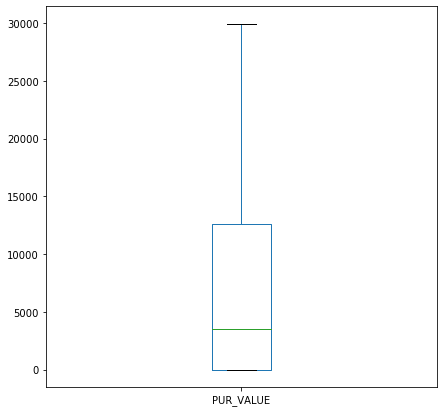

In [38]:
#Creating Box-Plot for Purchase Value
product['PUR_VALUE'].plot(subplots = True, kind = 'box', layout = (1,1), figsize = [7, 7])
plt.show()

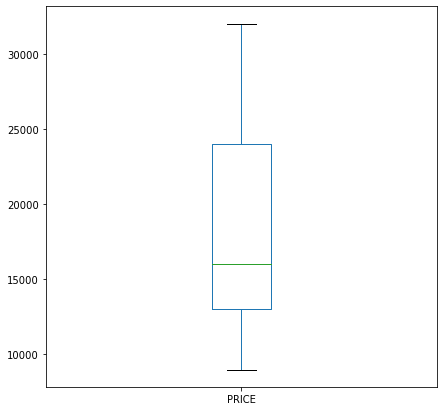

In [39]:
#Creating Box-Plot for Price
product['PRICE'].plot(subplots = True, kind = 'box', layout = (1,1), figsize = [7, 7])
plt.show()

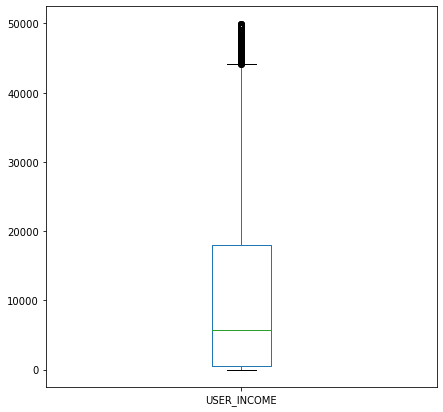

In [40]:
#Creating Box-Plot for User Income
product['USER_INCOME'].plot(subplots = True, kind = 'box', layout = (1,1), figsize = [7, 7])
plt.show()

We are seeing that in case of Purchase value and price there are no outliers in the data, however, in case of user income we find that there are some outlier observations. These outlier observations may pose a problem later while building the model and it is advised to treat those outliers using standardization technique. As treating outlier is a different process, for the current demonstration, we are not performing the same and this part will be discussed elsewhere. 
We will be considering the observations of the 3 mentioned variables as it is. 

Before building an appropriate model, we first need to see whether there is any multicollinearity in the data (independent variables) or not. If there is multi-collinearity in the data, it will increase the variance and ultimately it will lead to lesser accuracy. So we need to check the correlation matrix for the independent variables. 
For that we will first create a new dataframe 'product1' having only the independent variables. 

In [41]:
product1 = product.iloc[:,:-2]
product1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11157 entries, 0 to 11156
Data columns (total 5 columns):
USER_GENDER    11157 non-null int64
MARITAL        11157 non-null int64
PRICE          11157 non-null int64
NO_ITEMS       11157 non-null int64
PUR_VALUE      11157 non-null int64
dtypes: int64(5)
memory usage: 435.9 KB


We are creating a correlation matrix for 'product1'. 

In [42]:
product1.corr()

USER_GENDER   MARITAL     PRICE  NO_ITEMS  PUR_VALUE
USER_GENDER     1.000000  0.004660  0.008056  0.008791   0.006565
MARITAL         0.004660  1.000000  0.006684  0.011311   0.014041
PRICE           0.008056  0.006684  1.000000  0.011312   0.017037
NO_ITEMS        0.008791  0.011311  0.011312  1.000000   0.810733
PUR_VALUE       0.006565  0.014041  0.017037  0.810733   1.000000

From the correlation matrix, we are finding that Number of items and Purchase value are highly correlated. Let us create a heat-map which will give a better picture of the multi-collinearity. 

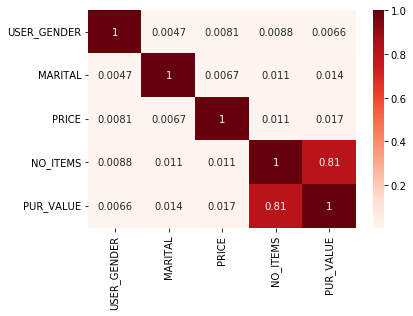

In [43]:
sns.heatmap(product1.corr(),annot = True,cmap='Reds')
plt.show()

The heat-map also tells that there are high correlation between Purchase Value and Number of items. From here we are also getting an idea that some correlation is there between user gender and user income. We can definitely consider one of the variable among the two - Purchase Value and Number of Items.

## 4. Improving the Models ##
We have seen Purchase Value and Number of items purchased are highly correlated. 
Hence, we are removing one variable (Purchase Value) and number of items (NO_ITEMS) is used as the independent varaible.
We follow the same process as before. 
We also have seen that in case of user income there are some outliers in the model and we have not treated those outliers. Hence, for the time-being, we are not considering the user income as independent variable and fitting the model without using that. 

In [44]:
X1 = np.array(product[['USER_GENDER','MARITAL','PRICE', 'NO_ITEMS']])
X1_train, X1_test, Y_train, Y_test = model_selection.train_test_split(X1, Y, test_size=0.2, random_state=25)
#Naive Bayes
nb=GaussianNB()
nb.fit(X1_train, Y_train)
print("Naive Bayes Accuracy Score =",nb.score(X1_test,Y_test)*100)


#Logistic Regression
#Training Model
log_reg = LogisticRegression()
log_reg.fit(X1_train, Y_train)
#Testing Model
print("Logistic Regression Accuracy Score =", log_reg.score(X1_test, Y_test)*100)

#k-NN Model
#Training Model
kNN = KNeighborsClassifier()
kNN.fit(X1_train, Y_train)
#Testing Model
print("k-NN Model Accuracy Score =", kNN.score(X1_test, Y_test)*100)

#Decision Tree Model
#Training Model
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X1_train, Y_train)
#Testing Model
print("Decision Tree Model Accuracy Score =", DecisionTree.score(X1_test, Y_test)*100)

#Support Vector Machine Model
#Training Model
svm = SVC()
svm.fit(X1_train, Y_train)
#Testing Model
print("Support Vector Machine Model Accuracy Score =", svm.score(X1_test, Y_test)*100)


rf=RandomForestClassifier()
rf.fit(X1_train, Y_train)
print("RandomForest Accuracy Score =",rf.score(X1_test,Y_test)*100)

/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manu/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Naive Bayes Accuracy Score = 76.7921146953405
Logistic Regression Accuracy Score = 65.3673835125448
k-NN Model Accuracy Score = 73.74551971326166
Decision Tree Model Accuracy Score = 76.7921146953405
Support Vector Machine Model Accuracy Score = 65.3673835125448


/tmp/ipykernel_69097/3762627072.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X1_train, Y_train)


RandomForest Accuracy Score = 76.7921146953405
